In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_rel, ttest_ind, kstest, chi2, chi2_contingency

In [2]:
# data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Yulu\Dataset\bike_sharing.csv')
data = pd.read_csv(r'E:\Nextstep\Scaler\Business-Case-Study\Yulu\Dataset\bike_sharing.csv')

# EDA

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Inference:**
- Total: 12 Columns
- Target: 'count'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Inference:
- No null values in all the columns
- datetime column is not in datetime64 format, conversion required
- All are numerical columns, some may be binary (holiday, working day, weather, etc.,)

In [11]:
for i in ['season', 'holiday', 'workingday', 'weather']:
    print(i, ': ', data[i].unique())

season :  [1 2 3 4]
holiday :  [0 1]
workingday :  [0 1]
weather :  [1 2 3 4]


Inference:
- Holiday and Working day are binary columns
- Season and Weather are categorical with 4 categories

In [12]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
Inference:
- Holiday: 

In [15]:
data['datetime'].min(), data['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

Inference: Dataset contains 2 years of data

In [18]:
data['date'] = pd.to_datetime(data['datetime']).dt.date
data['time'] = pd.to_datetime(data['datetime']).dt.time
data['day'] = pd.to_datetime(data['datetime']).dt.day_name()

# UVA

In [9]:
print('Total no. of days: ', data['date'].nunique())

Total no. of days:  456


<Axes: >

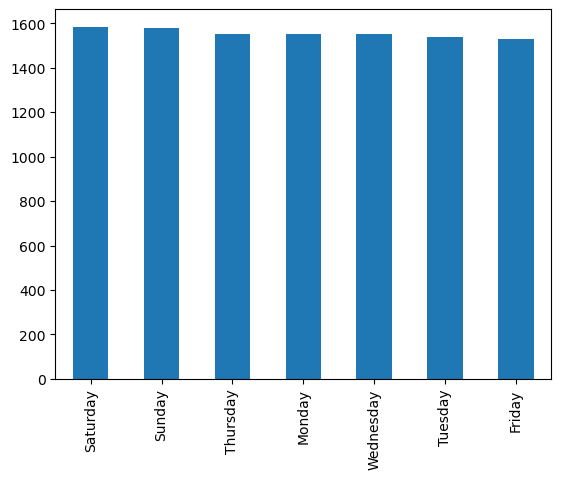

In [17]:
(pd.to_datetime(data['date']).dt.day_name().value_counts()).plot(kind='bar')

Inference:
- Above plot doesn't give any insight as it is a time series data from '2011-01-01 00:00:00', '2012-12-19 23:00:00' and it is recorded every 1 hour
- The univarite analysis on the given dataset gives the details about the conditions of the environment doesn't provides much insights to increase revenue

# BVA

<Axes: xlabel='day'>

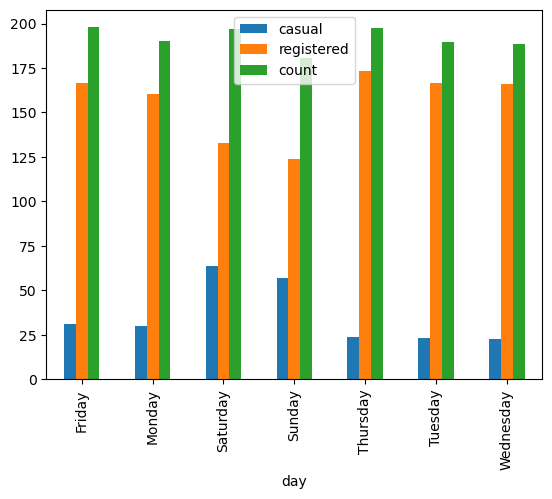

In [29]:
#Date Vs Count
data.groupby('day')[['casual', 'registered', 'count']].mean().plot(kind='bar')
#sns.barplot(data=data, x = 'day', y='casual', estimator='mean', hue='registered')

Inference:
- Casual users are comparativel very much higher on weekends and lesser on weedays
- Registered users are less during weekends
- Registered users are predominantly office goers or students
- Due to this behavior, the total count approximately remains constant throughout the days except Sunday
- It confirms the outside activity of the users are less on sunday
- Prediction of Casual users during weekends is very much required to optimize

<Axes: xlabel='year,season'>

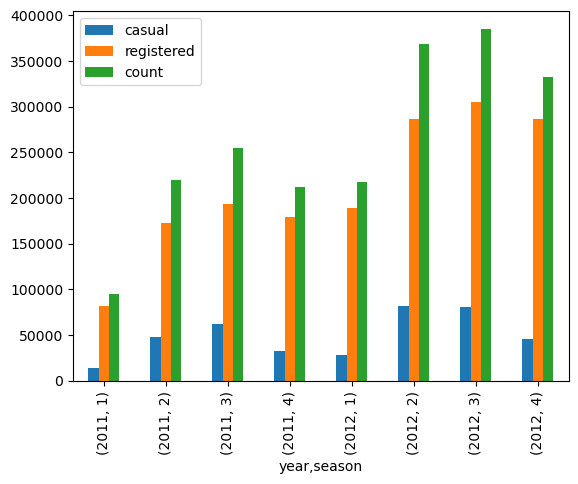

In [37]:
data.groupby(['year', 'season'])[['casual', 'registered', 'count']].sum().plot(kind='bar')

Inference:
Analysing the 2 years of data separately, both years show
- Much higher trend in Fall followed by Summer and Winter
- Spring shows very much lesser trend 
- Increasing trend for Registered users is noticed which is responsible for the YoY increasing trend
- Concentrating on increasing the registered users would helpful to increase the revenue

In [35]:
data.groupby('season')['date'].nunique()

season
1    114
2    114
3    114
4    114
Name: date, dtype: int64

In [36]:
data['year'] = pd.to_datetime(data['date']).dt.year